In [51]:
import requests

In [ ]:
#整个文档都被澳门覆盖了

In [52]:
import requests
#122 is INTERWETTEN
#277 is maoca
payload = {
    'corpId': 277,
    'winMin': 1.1,
    'winMax': 1.4,
    'drawMin': None,
    'drawMax': None,
    'lostMin': None,
    'lostMax': None,
    'indOddType': 0,
    'gameId': -1,
    'showcount': 500
}
response = requests.post('http://d.dacai.com/huicha/peilv.html', params=payload)

content_json = response.json()



In [53]:
bifen=content_json['SelectIndOddCorps']

In [55]:
def getwin(winmin,winmax):
    import requests
    payload = {
        'corpId': 277,
        'winMin': winmin,
        'winMax': winmax,
        'drawMin': None,
        'drawMax': None,
        'lostMin': None,
        'lostMax': None,
        'indOddType': 0,
        'gameId': -1,
        'showcount': 500
     }
    response = requests.post('http://d.dacai.com/huicha/peilv.html', params=payload)

    content_json = response.json()
    bifen=content_json['SelectIndOddCorps']
    import numpy as py
    import pandas as pd
    a=pd.DataFrame.from_records([bifen[0]])#创造第一个
    for i in range(len(bifen)):
        add=pd.DataFrame.from_records([bifen[i]])
        a=[a,add]
        a=pd.concat(a)
    return(a)

In [56]:
import pandas as pd
first1=pd.DataFrame.from_records([bifen[0]])
for i in range(19,60,1):
    new=getwin(i/10,(i+1)/10)
    first1=[first1,new]
    first1=pd.concat(first1)
first1.shape

(12893, 20)

In [57]:
first1.to_csv("interwteten1.9-6.0.csv")
datab=pd.read_csv("interwteten1.9-6.0.csv")
data3=pd.read_csv("bifa1.9to6.0.csv")
datamerge=pd.merge(datab,data3,how="inner",on=["AwayName","HomeName"])
datamerge.to_csv("pipeichenggonginter+betfair.csv",encoding="utf_8_sig")

In [58]:
datamerge.shape

(3349, 40)

In [59]:
import numpy as np
data1=pd.read_csv("pipeichenggonginter+betfair.csv")
#加上赛果
data1["result"]=data1["HomeName"]
datanew=data1["result"]
dataarray=np.array(datanew)
for i in range(0,len(data1["HomeName"]),1):
    if data1["HomeGoals_x"][i]>data1["AwayGoals_x"][i]:
        dataarray[i]=2
    elif data1["HomeGoals_x"][i]==data1["AwayGoals_x"][i]:
        dataarray[i]=1
    else:
        dataarray[i]=0
dataarray=dataarray.astype(int)
data1["result"]=dataarray
data1.head()

,Unnamed: 0,Unnamed: 0_x,AwayGoals_x,AwayHalfGoals_x,AwayName,AwayTeamId_x,ChuDraw_x,ChuLose_x,ChuWin_x,Color_x,...,GameId_y,GameName_y,HomeGoals_y,HomeHalfGoals_y,HomeTeamId_y,LoseOdds_y,MatchId_y,StartTime_y,WinOdds_y,result
0,0,0,1,0,西汉姆联,62,6.06,10.86,1.29,F90000,...,19,英超,3,1,156,5.10,594461,/Date(1353859140000)/,1.68,1
1,1,0,0,0,根特,6,3.42,3.81,2.00,737300,...,24,比甲,5,2,476,5.60,600082,/Date(1351623600000)/,1.53,2
2,2,0,0,0,根特,6,3.42,3.81,2.00,737300,...,24,比甲,5,2,476,5.60,600082,/Date(1351623600000)/,1.53,2
3,3,0,0,0,阿尔梅利,483,3.15,4.95,1.98,C20711,...,21,西乙,0,0,3238,2.94,606937,/Date(1369490400000)/,2.36,2
4,4,0,0,0,法基克,1495,3.22,3.46,1.93,1C75C3,...,141,苏甲,2,1,243,2.92,613269,/Date(1353164400000)/,2.26,1


In [60]:
data1["prowin"]=1-(1/data1['WinOdds_x'])*data1['WinOdds_y']

In [61]:
data1["prolse"]=1-(1/data1['LoseOdds_x'])*data1['LoseOdds_y']

In [62]:
data1["prodraw"]=1-(1/data1['DrawOdds_x'])*data1['DrawOdds_y']

In [63]:
data1["winoupeibianhua"]=1

In [64]:
data1["all"]=data1["prowin"]+data1["prolse"]+data1["prodraw"]

In [65]:
data1.to_csv("intertenpipeichengongjiabianlian.csv",encoding="utf_8_sig")

In [67]:
#报告内容当中的
data1=pd.read_csv("intertenpipeichengongjiabianlian.csv")

In [68]:
#增加了所有变量
data1["prowin"]=1-(1/data1['WinOdds_y'])*data1['WinOdds_x']
data1["prolse"]=1-(1/data1['LoseOdds_y'])*data1['LoseOdds_x']
data1["prodraw"]=1-(1/data1['DrawOdds_y'])*data1['DrawOdds_x']
data1["OwinC"]=data1['WinOdds_x']-data1['ChuWin_x']
data1["OdrawC"]=data1['DrawOdds_x']-data1['ChuDraw_x']
data1["OloseC"]=data1['LoseOdds_x']-data1['ChuLose_x']

data1["intercept"]=1.0


In [69]:
data1["1/win"]=1/data1["ChuWin_x"]
data1["1/draw"]=1/data1["ChuDraw_x"]
data1["1/lose"]=1/data1["ChuLose_x"]

In [70]:
#处理只要赢就是1，输球和平球都是0.    
res=data1["result"]
#要改变dataframe一定要这样先转换为np.array
res=np.array(res)
for i in range(0,len(data1["result"]),1):
    if res[i]==2:
        res[i]=1
    else:
        res[i]=0
data1["resultwin1,0"]=res

In [71]:
import statsmodels.api as sm

In [72]:
data1.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,AwayGoals_x,AwayHalfGoals_x,AwayName,AwayTeamId_x,ChuDraw_x,ChuLose_x,ChuWin_x,...,winoupeibianhua,all,OwinC,OdrawC,OloseC,intercept,1/win,1/draw,1/lose,"resultwin1,0"
0,0,0,0,1,0,西汉姆联,62,6.06,10.86,1.29,...,1,0.672377,-0.01,0.12,1.63,1.0,0.775194,0.165017,0.092081,0


In [73]:
data1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0_x', 'AwayGoals_x',
       'AwayHalfGoals_x', 'AwayName', 'AwayTeamId_x', 'ChuDraw_x', 'ChuLose_x',
       'ChuWin_x', 'Color_x', 'CorpId_x', 'DrawOdds_x', 'GameId_x',
       'GameName_x', 'HomeGoals_x', 'HomeHalfGoals_x', 'HomeName',
       'HomeTeamId_x', 'LoseOdds_x', 'MatchId_x', 'StartTime_x', 'WinOdds_x',
       'Unnamed: 0_y', 'AwayGoals_y', 'AwayHalfGoals_y', 'AwayTeamId_y',
       'ChuDraw_y', 'ChuLose_y', 'ChuWin_y', 'Color_y', 'CorpId_y',
       'DrawOdds_y', 'GameId_y', 'GameName_y', 'HomeGoals_y',
       'HomeHalfGoals_y', 'HomeTeamId_y', 'LoseOdds_y', 'MatchId_y',
       'StartTime_y', 'WinOdds_y', 'result', 'prowin', 'prolse', 'prodraw',
       'winoupeibianhua', 'all', 'OwinC', 'OdrawC', 'OloseC', 'intercept',
       '1/win', '1/draw', '1/lose', 'resultwin1,0'],
      dtype='object')

In [74]:
#指定作为训练变量的列
train_cols1 = data1.columns[[52,53,54,43,45,44,48,49,50,51]]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit1=sm.Logit(data1["resultwin1,0"], data1[train_cols1])

# 拟合模型
result1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.581722
         Iterations 5


In [75]:
#处理只要平局就是1，输球和赢球都是0.    
res=data1["result"]
#要改变dataframe一定要这样先转换为np.array
res=np.array(res)
for i in range(0,len(data1["result"]),1):
    if res[i]==1:
        res[i]=1
    else:
        res[i]=0
data1["resultwin1,0draw"]=res

In [76]:
#指定作为训练变量的列
train_cols2 = data1.columns[[52,53,54,43,45,44,48,49,50,51]]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit2=sm.Logit(data1["resultwin1,0draw"], data1[train_cols2])

# 拟合模型
result2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.582679
         Iterations 5


In [77]:
#处理只要输球就是1，平球和赢球都是0.    
res=data1["result"]
#要改变dataframe一定要这样先转换为np.array
res=np.array(res)
for i in range(0,len(data1["result"]),1):
    if res[i]==0:
        res[i]=1
    else:
        res[i]=0
data1["resultwin1,0lose"]=res

In [78]:
#指定作为训练变量的列
train_cols3 = data1.columns[[52,53,54,43,45,44,48,49,50,51]]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)


logit3=sm.Logit(data1["resultwin1,0lose"], data1[train_cols3])

# 拟合模型
result3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.666981
         Iterations 5


In [79]:
import copy
combos = copy.deepcopy(data1)
predict_cols = combos.columns[[52,53,54,43,45,44,48,49,50,51]]
combos['predictwin'] = result1.predict(combos[predict_cols])
combos['predictdraw'] = result2.predict(combos[predict_cols])
combos['predictlose'] = result3.predict(combos[predict_cols])

In [80]:
preall=0
preau=0
list1=[]
for i in range(50,95,1):
    
    for index,row in combos.iterrows():
        big=row["predictwin"]
        re=2
        if row["predictwin"]<=row["predictdraw"]:
            big=row["predictwin"]
            re=1
        if big<=row["predictlose"]:
            big=row["predictlose"]
            re=0
        if big>=i/100:
            preall+=1
            if row["result"]==re:
                preau+=1
    
    list1.append(i/100)  
    list1.append(preau/preall)

    
        
    
    
list1

[0.5,
 0.5613160518444666,
 0.51,
 0.5582627118644068,
 0.52,
 0.5599850968703428,
 0.53,
 0.5611702127659575,
 0.54,
 0.5607052896725441,
 0.55,
 0.5593869731800766,
 0.56,
 0.5568392820301217,
 0.57,
 0.557815223707147,
 0.58,
 0.5600370027752082,
 0.59,
 0.5614066404855409,
 0.6,
 0.5607979184735473,
 0.61,
 0.5613647937531828,
 0.62,
 0.5624895432491216,
 0.63,
 0.5643318430203677,
 0.64,
 0.5655104389281604,
 0.65,
 0.5665137614678899,
 0.66,
 0.5666830306005564,
 0.67,
 0.5668519123896698,
 0.68,
 0.567042299526376,
 0.69,
 0.5670910871694417,
 0.7,
 0.5672323759791122,
 0.71,
 0.567373572593801,
 0.72,
 0.5675146771037182,
 0.73,
 0.5676556895989566,
 0.74,
 0.5677966101694916,
 0.75,
 0.5677966101694916,
 0.76,
 0.5677966101694916,
 0.77,
 0.5677966101694916,
 0.78,
 0.5677966101694916,
 0.79,
 0.5677966101694916,
 0.8,
 0.5677966101694916,
 0.81,
 0.5677966101694916,
 0.82,
 0.5677966101694916,
 0.83,
 0.5677966101694916,
 0.84,
 0.5677966101694916,
 0.85,
 0.5677966101694916,

In [81]:
a1=np.array(list1)
a1=a1.reshape(45,2)
dfa1=pd.DataFrame(a1)

In [39]:
import matplotlib.pyplot as plt

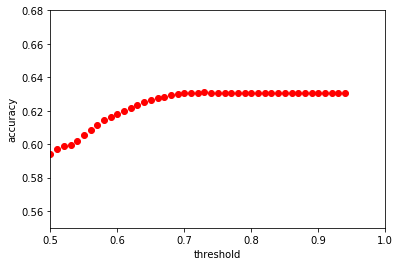

In [40]:
plt.plot(dfa1.iloc[:,0],dfa1.iloc[:,1],"ro")
plt.axis([0.5,1,0.55,0.68])
plt.ylabel("accuracy")
plt.xlabel("threshold")
plt.show()

In [82]:

list2=[]
for i in range(0,40,1):   
    money=0
    for index,row in combos.iterrows():
        l1=[(row['predictwin']-1/row['ChuWin_x']),(row['predictdraw']-1/row['ChuDraw_x']),(row['predictlose']-1/row['ChuLose_x'])]
        if max(l1)>i/100:
            b=l1.index(max(l1))
            if b==0:
                if row["result"]==2:
                    money=money+(row['ChuWin_x']-1)
                else:
                    money=money-1
            if b==1:
                if row["result"]==1:
                    money=money+(row['ChuDraw_x']-1)
                else:
                    money=money-1
            if b==2:
                if row["result"]==0:
                    money=money+(row['ChuLose_x']-1)
                else:
                    money=money-1
    list2.append(i/100)
    list2.append(money)
                
        
        
list2  

[0.0,
 112.31000000000031,
 0.01,
 76.3899999999998,
 0.02,
 131.19999999999993,
 0.03,
 104.09999999999987,
 0.04,
 114.85999999999993,
 0.05,
 92.06999999999994,
 0.06,
 25.040000000000006,
 0.07,
 0.21000000000000618,
 0.08,
 13.609999999999994,
 0.09,
 24.090000000000003,
 0.1,
 21.979999999999997,
 0.11,
 17.06,
 0.12,
 7.640000000000001,
 0.13,
 11.639999999999999,
 0.14,
 7.74,
 0.15,
 7.49,
 0.16,
 6.92,
 0.17,
 7.92,
 0.18,
 7.359999999999999,
 0.19,
 4.91,
 0.2,
 4.91,
 0.21,
 4.91,
 0.22,
 4.91,
 0.23,
 4.91,
 0.24,
 4.91,
 0.25,
 5.91,
 0.26,
 5.91,
 0.27,
 3.0599999999999996,
 0.28,
 3.0599999999999996,
 0.29,
 3.0599999999999996,
 0.3,
 3.0599999999999996,
 0.31,
 3.0599999999999996,
 0.32,
 3.0599999999999996,
 0.33,
 -1,
 0.34,
 -1,
 0.35,
 -1,
 0.36,
 -1,
 0.37,
 -1,
 0.38,
 -1,
 0.39,
 -1]

In [83]:
al2=np.array(list2)
al2=al2.reshape(40,2)
dfal2=pd.DataFrame(al2)

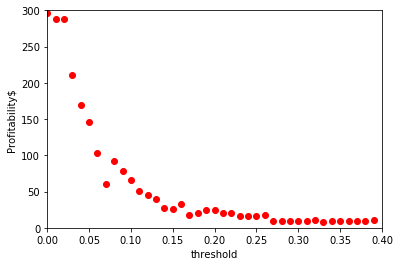

In [44]:
plt.plot(dfal2.iloc[:,0],dfal2.iloc[:,1],"ro")
plt.axis([0,0.4,0,300])
plt.ylabel("Profitability$")
plt.xlabel("threshold")
plt.show()

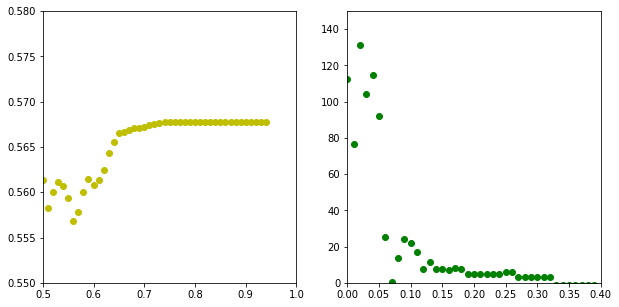

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(dfa1.iloc[:,0],dfa1.iloc[:,1],"yo")
axs[0].axis([0.5,1,0.55,0.58])



axs[1].plot(dfal2.iloc[:,0],dfal2.iloc[:,1],"go")
axs[1].axis([0,0.4,0,150])

plt.show()